## Visualization of UNSW Dataset

Space transformation and conversion into two dimensional space has been performed here to get a better idea of data distribution

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import pickle as pkl
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import ClusterCentroids 
%matplotlib inline

In [30]:
df=pd.read_csv('E:/UNSW-NB15 Dataset/UNSW-NB15-CSV-Files/Preprocessed-CSV/UNSW-NB15_processed.csv')

C:\Users\yasir.ali\AppData\Local\Temp\ipykernel_9724\1275857462.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('E:/UNSW-NB15 Dataset/UNSW-NB15-CSV-Files/Preprocessed-CSV/UNSW-NB15_processed.csv')


In [31]:
len(df.proto.unique())
## Since too many unique values, grouping them for better visualization


135

In [32]:
transformations = {'proto':['tcp', 'udp', 'arp', 'unas'],
                   'state':['fin', 'con', 'int'],
                    'service':['None', 'dns']}

In [33]:
##Reduces the string values found in a column to the values provided in the list 'to_keep'.
def reduce_column(s, to_keep):
    s = s.lower().strip()
    if s not in to_keep:
        return 'other'
    else:
        return s

In [34]:
for col, keepers in transformations.items():
    df[col] = df[col].apply(reduce_column,args=(keepers,))

In [35]:
## Removing Columns that doesnot play a part in IDS
drop_cols = ['srcip', 'sport', 'dstip', 'dsport','stcpb','dtcpb','ltime', 'stime']
df.drop(columns=drop_cols,inplace=True)

In [36]:
## transforming str columns into numerical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.proto = le.fit_transform(df.proto)
df.state = le.fit_transform(df.state)
df.service = le.fit_transform(df.service)

In [37]:
df.attack_cat.value_counts()

normal            1959772
exploits            27599
generic             25378
fuzzers             21795
reconnaissance      13357
dos                  5665
analysis             2185
backdoor             1984
shellcode            1511
worms                 171
Name: attack_cat, dtype: int64

In [38]:
X_0, X, Y_0, Y = train_test_split(df.iloc[:,:-2],df['attack_cat'],stratify=df['attack_cat'], test_size=0.99, random_state=225)

In [39]:
Y.value_counts()

normal            1940175
exploits            27323
generic             25124
fuzzers             21577
reconnaissance      13224
dos                  5608
analysis             2163
backdoor             1964
shellcode            1496
worms                 169
Name: attack_cat, dtype: int64

In [61]:
tsne=TSNE(n_components=2, verbose=0)
tsne_res = tsne.fit_transform(X)

C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### 2D Visualization of data (When 5% of data is transformed)

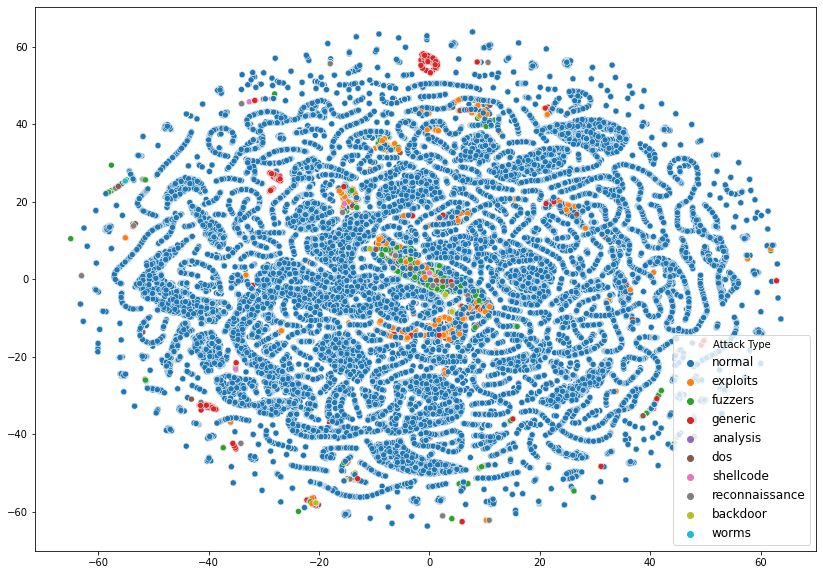

In [67]:
plt.figure(figsize=[14,10])
sns.scatterplot(x=tsne_res[:,0], y=tsne_res[:,1], hue=Y)
#plt.axis('off')
plt.legend(loc=4, prop={'size': 12}, title='Attack Type');`

In [72]:
df_attack=df[df.attack_cat!='normal']

In [117]:
X_0, X, Y_0, Y = train_test_split(df_attack.iloc[:,:-2],df_attack['attack_cat'],stratify=df_attack['attack_cat'], test_size=0.99, random_state=225)

In [118]:
Y.value_counts()

exploits          27323
generic           25124
fuzzers           21577
reconnaissance    13224
dos                5609
analysis           2163
backdoor           1964
shellcode          1496
worms               169
Name: attack_cat, dtype: int64

In [ ]:
tsne=TSNE(n_components=2, verbose=0)
tsne_res_a = tsne.fit_transform(X)

### 2D Visualization of Attack Data instancces Only

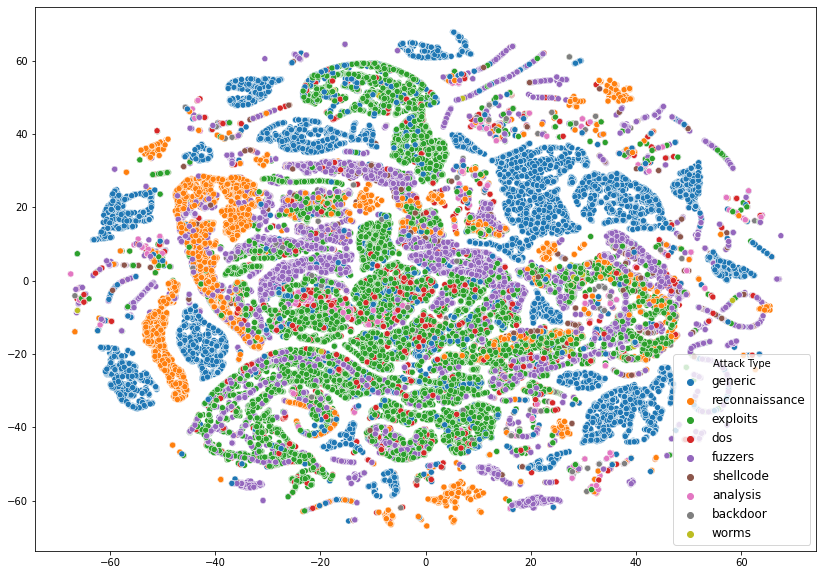

In [84]:
plt.figure(figsize=[14,10])
sns.scatterplot(x=tsne_res_a[:,0], y=tsne_res_a[:,1], hue=Y)
#plt.axis('off')
plt.legend(loc=4, prop={'size': 12}, title='Attack Type')

In [122]:
from sklearn.preprocessing import StandardScaler as SS
scaler = StandardScaler()
x=scaler.fit_transform(X)

### 2D Visualization of Standardized Attack Data instancces

C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


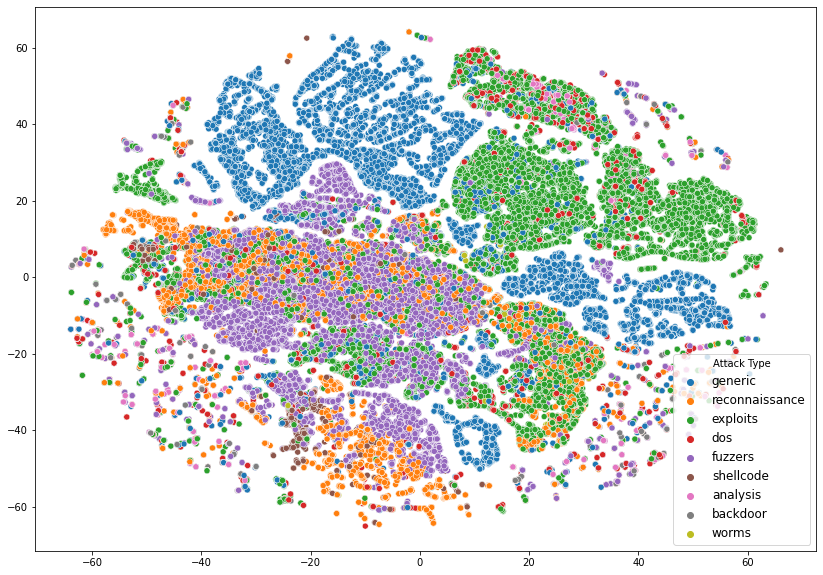

In [89]:
tsne=TSNE(n_components=2, verbose=0)
tsne_res_a = tsne.fit_transform(x)
plt.figure(figsize=[14,10])
sns.scatterplot(x=tsne_res_a[:,0], y=tsne_res_a[:,1], hue=Y)
#plt.axis('off')
plt.legend(loc=4, prop={'size': 12}, title='Attack Type')

In [40]:
dict_u1={'normal': 30000, 'exploits': 27323, 'reconnaissance': 13224, 'dos': 5608, 'generic': 25124,
       'shellcode':1496, 'fuzzers': 21577, 'worms':169, 'backdoor':1964, 'analysis': 2163 }

In [41]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42,sampling_strategy=dict_u1)
x, y = rus.fit_resample(X, Y)

In [42]:
y.value_counts()
from sklearn.preprocessing import StandardScaler as SS
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [43]:
dict_u={'normal': 1000, 'exploits': 1000, 'reconnaissance': 1000, 'dos': 1000, 'generic': 1000,
       'shellcode':1000, 'fuzzers': 1000, 'worms':169, 'backdoor':1000, 'analysis': 1000 }

In [44]:
y.value_counts()

normal            30000
exploits          27323
generic           25124
fuzzers           21577
reconnaissance    13224
dos                5608
analysis           2163
backdoor           1964
shellcode          1496
worms               169
Name: attack_cat, dtype: int64

In [45]:
cc = ClusterCentroids(random_state=42,sampling_strategy=dict_u)
X_res, y_res = cc.fit_resample(x, y)

### 2D Visualization Standardized Data

Undersampling is perfomed to balanced the overall data for proper visualization. Moreover, Cluster based approach is adopted for undersampling the datapoints

C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


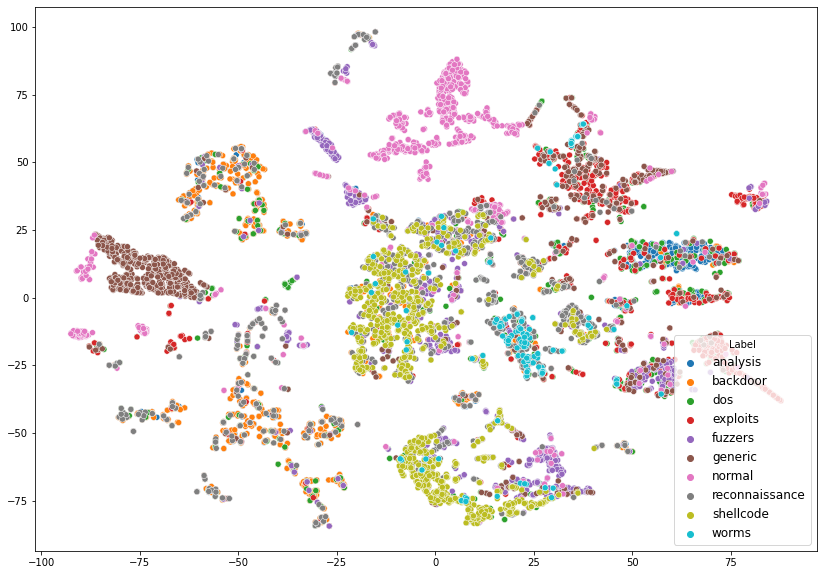

In [50]:
tsne=TSNE(n_components=2, verbose=0)
tsne_res_a = tsne.fit_transform(X_res)
plt.figure(figsize=[14,10])
sns.scatterplot(x=tsne_res_a[:,0], y=tsne_res_a[:,1], hue=y_res)
#plt.axis('off')
plt.legend(loc=4, prop={'size': 12}, title='Label')